# Labeled Wafer Images

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

## Silicon Wafer 1

### Load Data

In [3]:
# location of silicon wafer 1 data
dir_silicon_wafer_1 = "../dataset/silicon_wafer_1"

Read the image of Silicon Wafer 1:

In [4]:
wafer_1 = cv.imread(f"{dir_silicon_wafer_1}/wafer_1_downsize_3.tif")
wafer_1_lg = cv.resize(wafer_1, (6136, 5616)) 

Read the labels of tissue from the file:

In [5]:
wafer_tissue_lbl = pd.read_csv(f"{dir_silicon_wafer_1}/source_sections_tissue.txt", sep="\t", header=None, names=["point_1", "point_2", "point_3", "point_4", "nn"], 
                               usecols=["point_1", "point_2", "point_3", "point_4"])
wafer_tissue_lbl.head()

point_1    point_2    point_3    point_4
0  6785,3094  6724,2937  7103,2812  7120,2965
1  6347,3218  6275,3066  6649,2922  6675,3071
2  6037,3596  5972,3442  6352,3314  6371,3463
3  6487,3605  6399,3461  6749,3274  6793,3424
4  6858,3507  6776,3363  7136,3187  7170,3333

In [6]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), 
                                   ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), 
                                   ('point_4', 'x'), ('point_4', 'y')])

new_wafer_df = pd.DataFrame(columns=index)
new_wafer_df.head()

Empty DataFrame
Columns: [(point_1, x), (point_1, y), (point_2, x), (point_2, y), (point_3, x), (point_3, y), (point_4, x), (point_4, y)]
Index: []

In [7]:
wafer_tissue_lbl.shape

(514, 4)

Read the labels of magnet from the file:

In [8]:
wafer_magnet_lbl = pd.read_csv(f"{dir_silicon_wafer_1}/source_sections_mag.txt", sep="\t", header=None, names=["point_1", "point_2", "point_3", "point_4", "nn"], usecols=["point_1", "point_2", "point_3", "point_4"])
wafer_magnet_lbl.head()

point_1    point_2    point_3    point_4
0  6840,3232  6787,3099  7120,2968  7143,3117
1  6410,3355  6351,3225  6672,3075  6707,3217
2  6096,3733  6041,3599  6372,3467  6396,3610
3  6566,3739  6490,3609  6791,3425  6842,3564
4  6930,3636  6859,3510  7171,3336  7212,3479

In [9]:
wafer_magnet_lbl.shape

(514, 4)

### Drawing

Helper to convert hex color code to RGB code.

In [10]:
def rgb(hex_color):
    return tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))

Some general settings:

In [11]:
scale = 3
thickness = 5
magnet_color = "#00cccc"
tissue_color = "#ff6666"

fill_poly = False

Draw the magnet labels:

In [12]:
for row in range(wafer_magnet_lbl.shape[0]):
    pts = np.array([np.array(list(map(int, wafer_magnet_lbl.iloc[row]['point_1'].split(','))))//scale,
                    np.array(list(map(int, wafer_magnet_lbl.iloc[row]['point_2'].split(','))))//scale,
                    np.array(list(map(int, wafer_magnet_lbl.iloc[row]['point_3'].split(','))))//scale,
                    np.array(list(map(int, wafer_magnet_lbl.iloc[row]['point_4'].split(','))))//scale]).reshape((-1,1,2))
    if fill_poly:
        wafer_1_lg = cv.fillPoly(wafer_1_lg, np.int32([pts]), color=rgb(magnet_color))
    else:
        wafer_1_lg = cv.polylines(wafer_1_lg, np.int32([pts]), True, color=rgb(magnet_color), thickness=thickness)

Draw the tissue labels:

In [13]:
for row in range(wafer_tissue_lbl.shape[0]):
    pts = np.array([np.array(list(map(int, wafer_tissue_lbl.iloc[row]['point_1'].split(','))))//scale,
                    np.array(list(map(int, wafer_tissue_lbl.iloc[row]['point_2'].split(','))))//scale,
                    np.array(list(map(int, wafer_tissue_lbl.iloc[row]['point_3'].split(','))))//scale,
                    np.array(list(map(int, wafer_tissue_lbl.iloc[row]['point_4'].split(','))))//scale]).reshape((-1,1,2))
    if fill_poly:
        wafer_1_lg = cv.fillPoly(wafer_1_lg, np.int32([pts]), color=rgb(tissue_color))  # polylines
    else:
        wafer_1_lg = cv.polylines(wafer_1_lg, np.int32([pts]), True, color=rgb(tissue_color), thickness=thickness)  # polylines

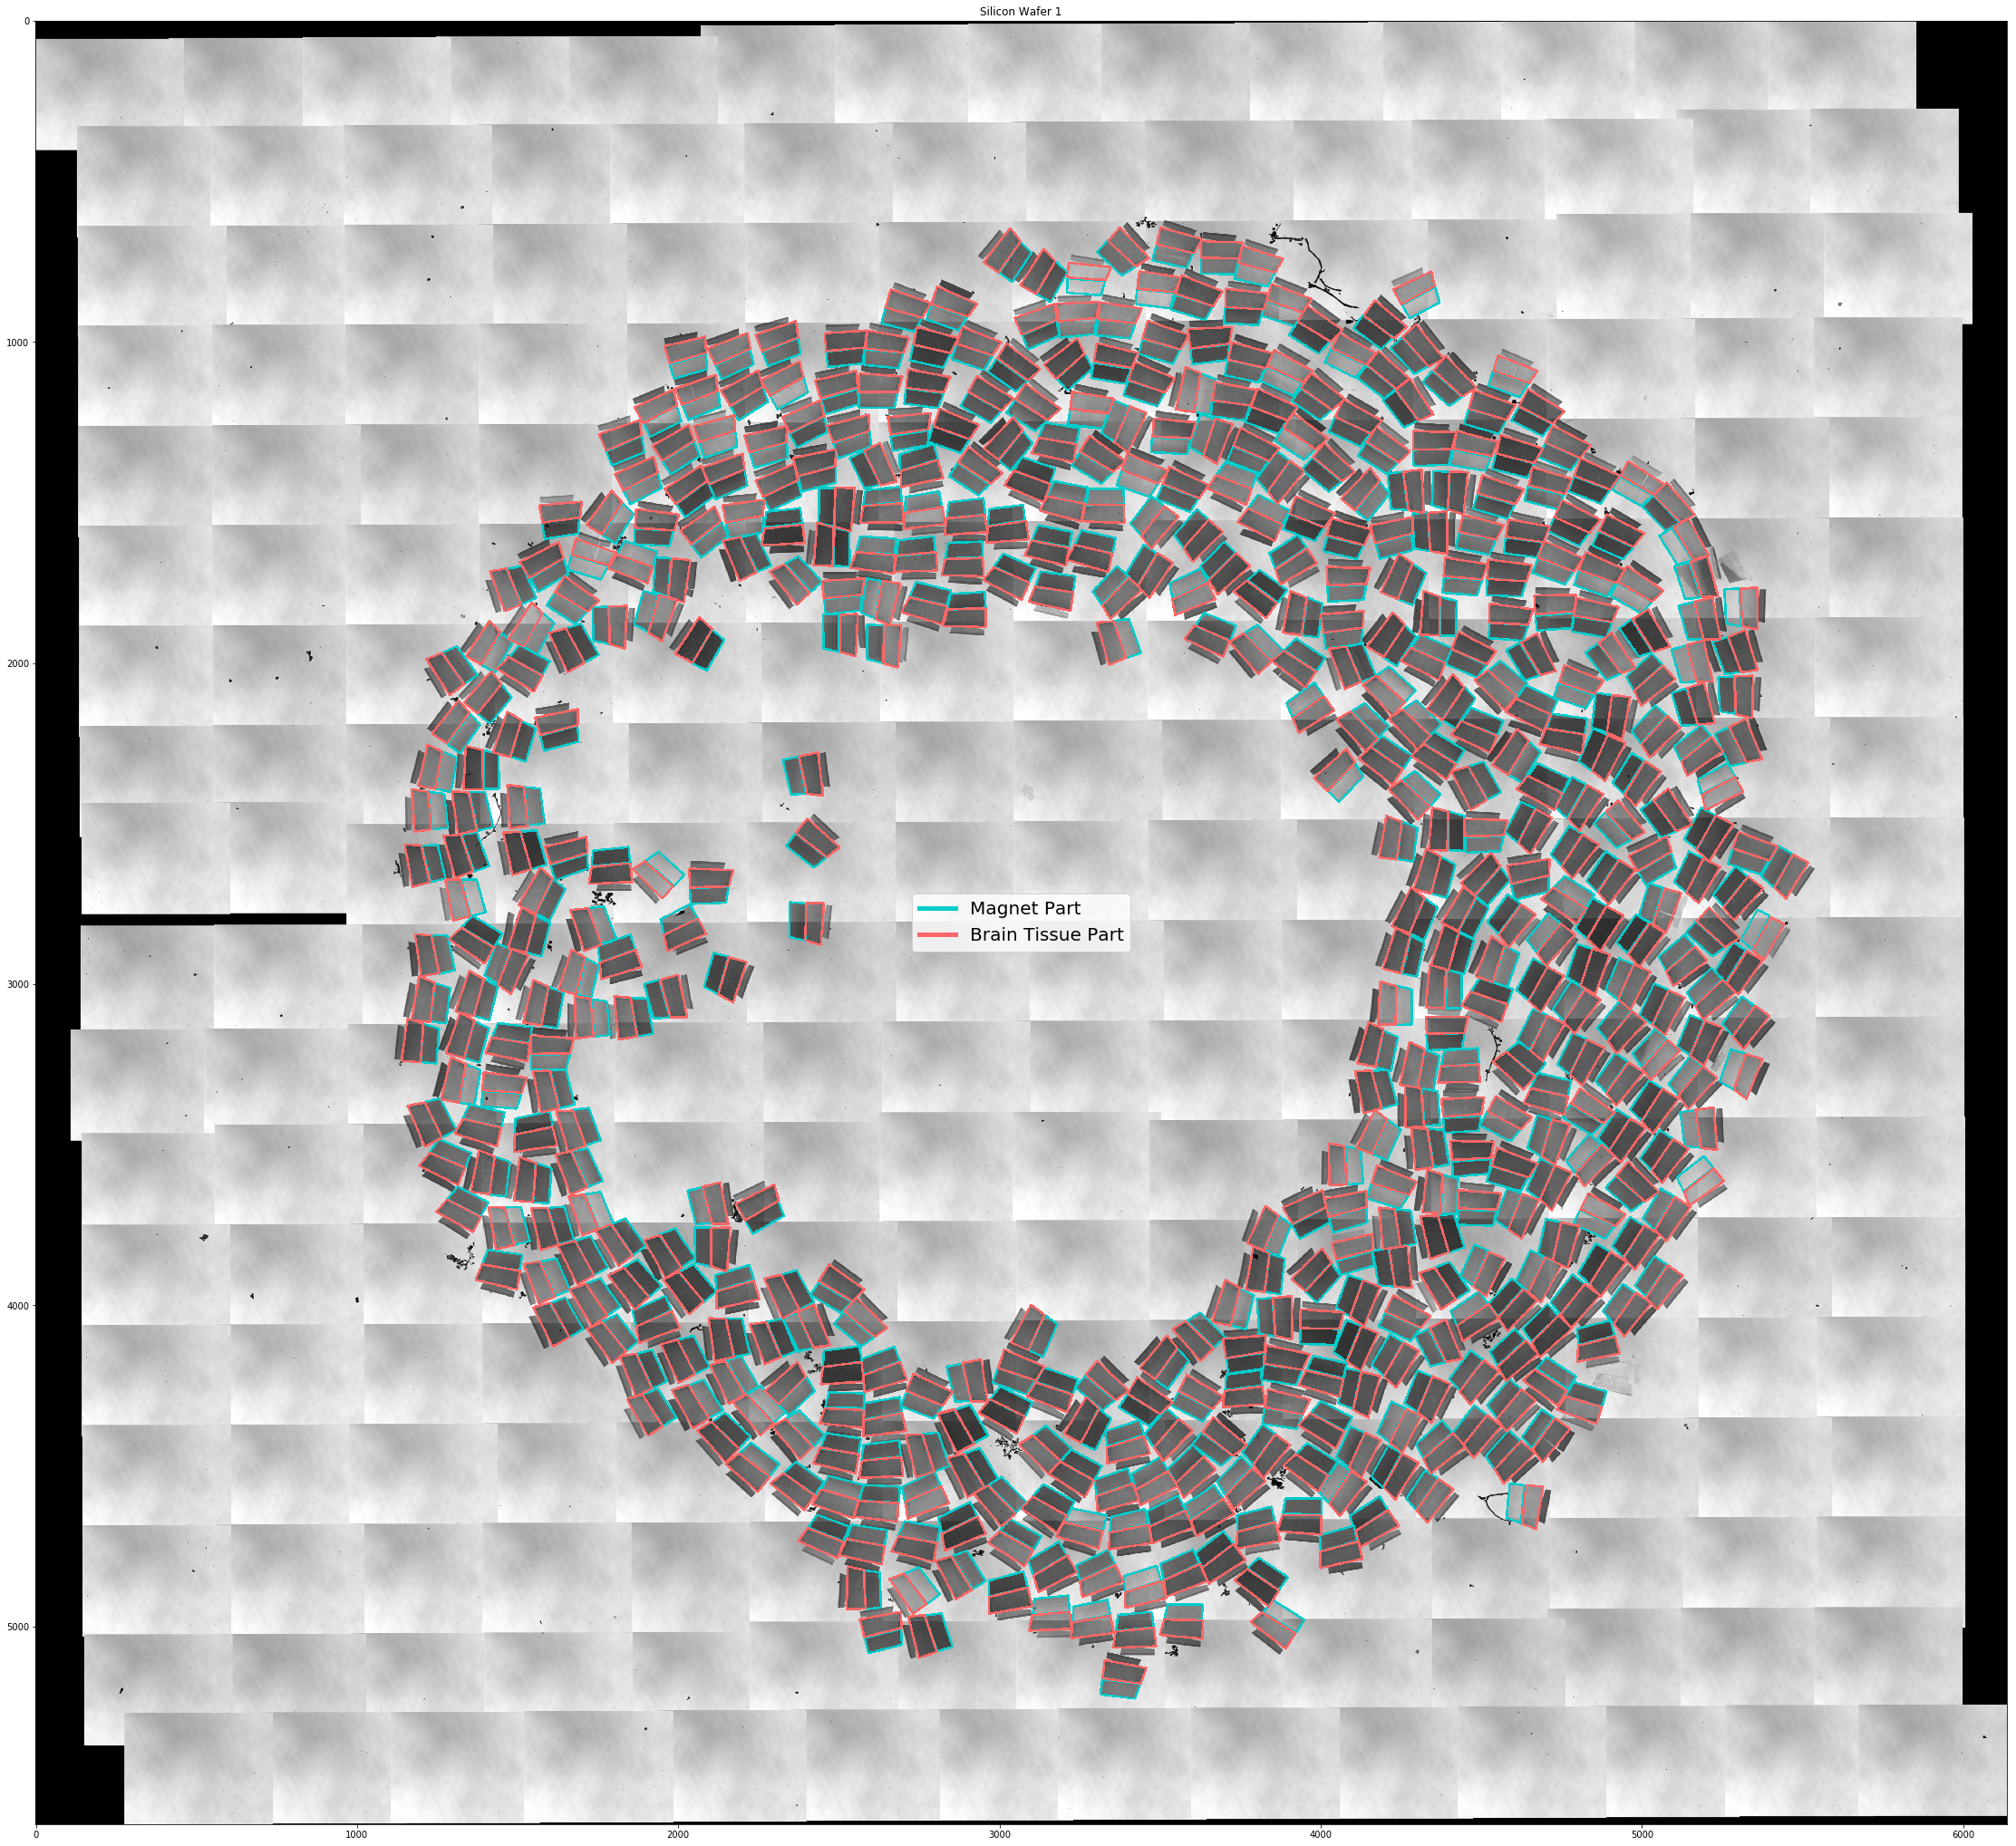

In [14]:
plt.figure(figsize=(40, 36.61))
plt.imshow(wafer_1_lg)

plt.title('Silicon Wafer 1')

legend_elements = [Line2D([0], [0], color=magnet_color, lw=5, label='Magnet Part'),
                   Line2D([0], [0], color=tissue_color, lw=5, label='Brain Tissue Part')]
plt.legend(handles=legend_elements, loc='center', fontsize=20)

plt.show()

## Silicon Wafer 2

In [ ]:
# TODO the same as Silicon Wafer 1 but wait till we optimize code a bit